In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import get_file
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_path = get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/Users/rjagtap/.keras/datasets/auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']


In [4]:
dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)


In [5]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.isna().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(dataset, test_size=0.2)

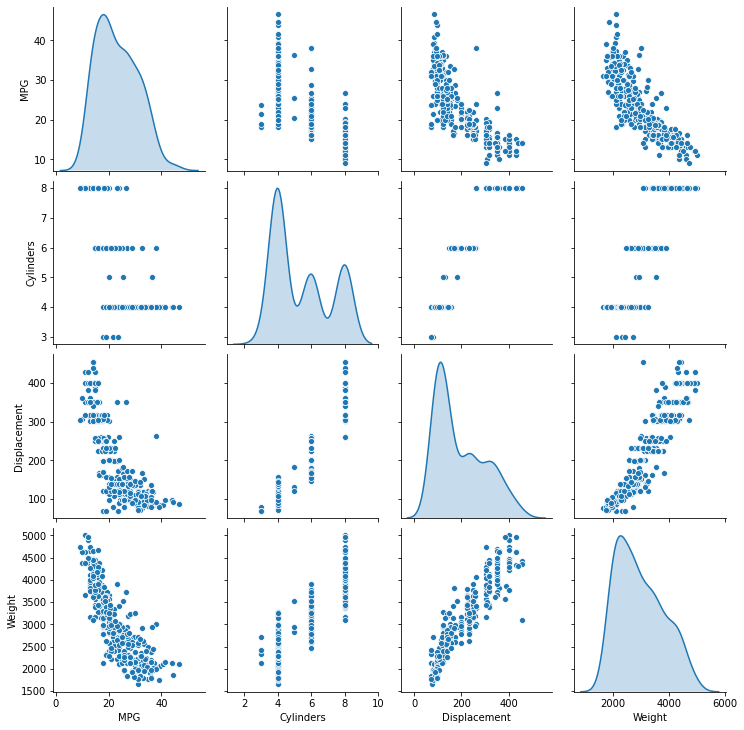

In [11]:
sns.pairplot(x_train[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [12]:
y_train = x_train.pop('MPG')
y_test = x_test.pop('MPG')

In [13]:
x_train.describe()
stats = x_train.describe().transpose()

In [14]:
def norm(x):
  return (x - stats['mean']) / stats['std']

x_train = norm(x_train)
x_test = norm(x_test)

In [15]:
x_train.isna().sum(), x_test.isna().sum(), y_train.isna().sum(), y_test.isna().sum()

(Cylinders       0
 Displacement    0
 Horsepower      0
 Weight          0
 Acceleration    0
 Model Year      0
 Europe          0
 Japan           0
 USA             0
 dtype: int64,
 Cylinders       0
 Displacement    0
 Horsepower      0
 Weight          0
 Acceleration    0
 Model Year      0
 Europe          0
 Japan           0
 USA             0
 dtype: int64,
 0,
 0)

In [16]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[len(x_train.keys())]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [17]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse', 'mae'])

In [19]:
model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_test, y_test), verbose=0)

In [20]:
model.evaluate(x_test, y_test)

79/79 [==============================] - 0s 92us/sample - loss: 4.3028 - mse: 4.3028 - mae: 1.6216 - acc: 0.0000e+00


[4.302824298037758, 4.3028245, 1.6215596, 0.0]